In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter

In [3]:
sumin = pd.read_csv('./sumin.csv')

In [4]:
sumin.columns

Index(['date', 'name', 'sleepingTime', 'quality', 'dinnerTime', 'dinnerMenu',
       'phone', 'phoneTime', 'nap', 'stress', 'alcohol', 'coffee', 'caffein',
       'exTime', 'exIntensity', 'Unnamed: 15', 'tired', 'alarm', 'alarmNum',
       'nextNap', 'sleepy'],
      dtype='object')

In [5]:
sumin.dtypes

date             object
name             object
sleepingTime      int64
quality           int64
dinnerTime        int64
dinnerMenu        int64
phone             int64
phoneTime         int64
nap               int64
stress            int64
alcohol           int64
coffee            int64
caffein           int64
exTime            int64
exIntensity       int64
Unnamed: 15     float64
tired             int64
alarm             int64
alarmNum          int64
nextNap           int64
sleepy            int64
dtype: object

# 수면시간의 범위

In [6]:
sumin['sleepingTime'].max() - sumin['sleepingTime'].min()

546

In [7]:
sumin["sleepingTime"].quantile(0.75) - sumin["sleepingTime"].quantile(0.25)

130.75

# 수면시간과 피로도의 box whisker plot

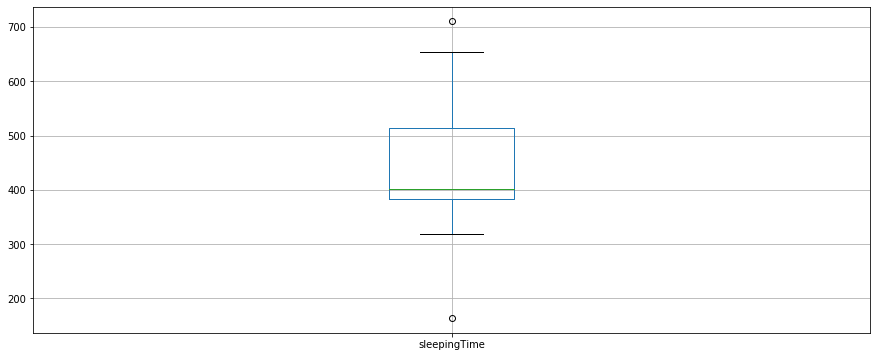

In [8]:
box = sumin.boxplot(column=['sleepingTime'], figsize=(15,6), vert=True)

In [14]:
box.get_figure().savefig('sumin_boxplot.png')

# 요인들간의 상관관계

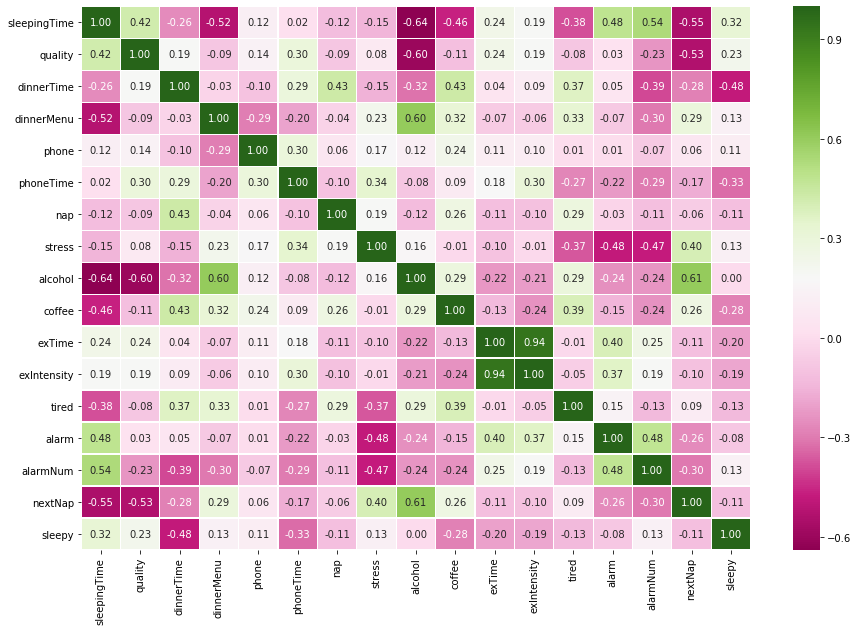

In [12]:
plt.figure(figsize=(15, 10))
heat = sns.heatmap(sumin.drop('Unnamed: 15', axis = 1).drop('caffein', axis = 1).corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='PiYG')
plt.show()

In [15]:
heat.get_figure().savefig('sumin_heatmap.png')

### positive relation
1. quality/sleepingTime : .42   
수면시간이 긴 날, 수면의 질이 높다.
2. tired/dinnerTime : .37  
저녁을 일찍 먹은 다음 날, 피로도가 높다. 
3. tired/dinnerMenu : .33  
저녁을 헤비하게 먹은 다음 날, 피로도가 높다.
4. tired/stress : .37  
스트레스가 심한 다음 날, 피로도가 높다. 
5. tired/coffee : .39  
커피를 마신 다음 날, 피로도가 높다. 
6. nextNap/stress : .4  
스트레스를 많이 받은 다음 날, 낮잠을 잔다.
7. nextNap/alcohol : .61  
술을 마신 다음 날, 낮잠을 잔다.

### negative relation
1. quality/alcohol : -.6  
술을 마신 날, 수면의 질이 낮다.
2. nextNap/sleepingTime :.55  
잠을 많이 잔 다음 날, 낮잠을 잘 확률이 높다. 
3. quality/nextNap : -.53  
수면의 질이 낮은 날, 낮잠을 잔다.
4. tired/sleepingTime : -.38  
수면시간이 긴 다음 날, 피로도가 낮아진다. 
5. sleepy/dinnerTime :-.48  
저녁을 일찍 먹은 다음 날, 더 많이 존다.